# Analysis of influence living conditions of pupils to the  score of the Mathematic


This Dataset gives us an information about different aspects of pupils life in connection of their school performance.
With this data I will answer the following questions:
    1. Which influence to mathematical score has famaly sitution?
    2. Which influence to mathematical score has sosial activity?
    3. The role of intensity of the educational process?
    4. The most common factors affecting the absence?
    5. The combination of factors forming a risk group?


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) #to show more rows
pd.set_option('display.max_columns', 50) #to show more columns



In [4]:
stud_math=pd.read_csv('stud_math.csv')
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [5]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [6]:
stud_math.isnull().sum() 

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

As we see we have a big amount of columns so we will devide the DataFtrame to parts according to a subject of analysis.

Let's start to discover the family situation of pupils and its influence on mathematical performance.

In [10]:
fam_sit=stud_math[['sex','age','famsize','Pstatus','Medu', 'Fedu', 'Mjob','Fjob','guardian','traveltime', 'absences', 'score']]
fam_sit

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,absences,score
0,F,18,NaN,A,4.0,4.0,at_home,teacher,mother,2.0,6.0,30.0
1,F,17,GT3,NaN,1.0,1.0,at_home,other,father,1.0,4.0,30.0
2,F,15,LE3,T,1.0,1.0,at_home,other,mother,1.0,10.0,50.0
3,F,15,GT3,T,4.0,2.0,health,NaN,mother,1.0,2.0,75.0
4,F,16,GT3,T,3.0,3.0,other,other,father,1.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2.0,2.0,services,services,NaN,1.0,212.0,45.0
391,M,17,LE3,T,3.0,1.0,services,services,mother,2.0,3.0,80.0
392,M,21,GT3,T,1.0,1.0,other,other,NaN,1.0,3.0,35.0
393,M,18,LE3,T,3.0,2.0,services,other,mother,3.0,0.0,50.0


Let's see sex and age ratio in DataFrame:

F    208
M    187
Name: sex, dtype: int64


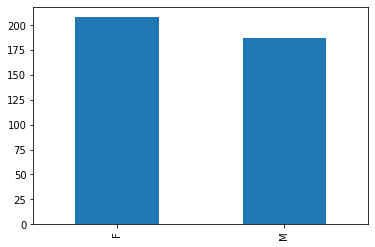

In [13]:
print(stud_math.sex.value_counts())
stud_math.sex.value_counts().plot(kind='bar')


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

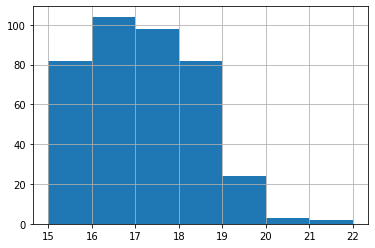

In [14]:
stud_math.age.hist(bins=7)
stud_math.age.describe()

Let's check wether we have some outliers here:

In [15]:
median=stud_math.age.median()
perc25=stud_math.age.quantile(0.25)
perc75=stud_math.age.quantile(0.75)
IQR=perc75-perc25
print('25% percentile:{},'.format(perc25), '75% percentile:{},'.format(perc75), 'IQR:{},'.format(IQR), 'limits of outliers: [{f},{l}]'.format(f=perc25-1.5*IQR, l=perc75+1.5*IQR))
outliers_age=stud_math.age.loc[stud_math.age>21]

print('there are {} pupils older then 21 years old'.format(len(outliers_age)))



25% percentile:16.0, 75% percentile:18.0, IQR:2.0, limits of outliers: [13.0,21.0]
there are 1 pupils older then 21 years old


In [ ]:
The famaly size column gives us an information about 

GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64


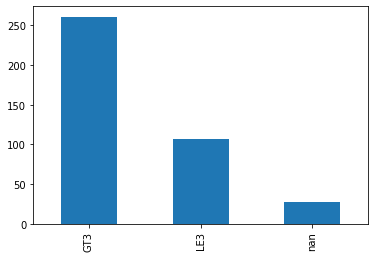

In [17]:
stud_math.famsize=stud_math.famsize.apply(lambda x: None if str(x).strip() == '' else x)
print(stud_math.famsize.astype(str).value_counts())
stud_math.famsize.astype(str).value_counts().plot(kind='bar')